## Student Performance

### 데이터 로드 및 전처리

In [ ]:
import pandas as pd

URL = "http://suanlab.com/datasets/student_data.csv"
df = pd.read_csv(URL)

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


- school : student's school ('GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira )
- sex : student's sex ('F' - female or 'M' - male)
- age : student's age (from 15 to 22)
- address : student's home address type ('U' - urban or 'R' - rural)
- famsize : family size ('LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus : parent's cohabitation status ('T' - living together or 'A' - apart)
- Medu : mother's education (0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary or 4 â€“ higher education)
- Fedu : father's education (0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary or 4 â€“ higher education)
- Mjob : mother's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob : father's job ('teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason : reason to choose this school (close to 'home', school 'reputation', 'course' preference or 'other')
- guardian : student's guardian ('mother', 'father' or 'other')
- traveltime : home to school travel time (1 - < 5 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- studytime : weekly study time (1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures : number of past class failures ( n if 1<=n < 3, else 4)
- famsup : family educational support ( yes or no)
- paid : extra paid classes within the course subject (Math or Portuguese) ( yes or no)
- activities : extra-curricular activities (yes or no)
- nursery : attended nursery school ( yes or no)
- higher : wants to take higher education ( yes or no)
- internet : Internet access at home ( yes or no)
- romantic : with a romantic relationship ( yes or no)
- famrel : quality of family relationships ( from 1 - very bad to 5 - excellent)
- freetime : free time after school ( from 1 - very low to 5 - very high)
- goout : going out with friends ( from 1 - very low to 5 - very high)
- Dalc : workday alcohol consumption ( from 1 - very low to 5 - very high)
- Walc : weekend alcohol consumption (from 1 - very low to 5 - very high)
- health : current health status (from 1 - very bad to 5 - very good)
- absences : number of school absences (from 0 to 93)
- G1 : first period grade ( from 0 to 20)
- G2 : second period grade ( from 0 to 20)
- G3 : final grade ( from 0 to 20, output target)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
target = 'school'
x = pd.get_dummies(df.drop(columns=[target])).astype('float32')
y = df[target].apply(lambda school: 1. if school == 'GP' else 0.)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

### 모델 구성 및 컴파일

In [ ]:
from keras.layers import Dropout

inp = Input(shape=(len(x_train.columns), ), name='Input')
dense_1 = Dense(64, kernel_initializer='he_normal', name="Dense_1")(inp)
bn_1 = BatchNormalization(name='Bn_1')(dense_1)
act_1 = Activation('relu')(bn_1)
dropout_1 = Dropout(0.5)(act_1)
dense_2 = Dense(64, kernel_initializer='he_normal', name='Dense_2')(dropout_1)
bn_2 = BatchNormalization(name='Bn_2')(dense_2)
act_2 = Activation('relu')(bn_2)
dropout_2 = Dropout(0.5)(act_2)
out = Dense(1, activation='sigmoid', name='Output')(dropout_2)

model = Model(inputs=inp, outputs=out)

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stop_cb = EarlyStopping(
    patience=20,
    monitor="val_loss",
    restore_best_weights=True
)

model.summary()

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 57)]              0         
                                                                 
 Dense_1 (Dense)             (None, 64)                3712      
                                                                 
 Bn_1 (BatchNormalization)   (None, 64)                256       
                                                                 
 activation_20 (Activation)  (None, 64)                0         
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 Dense_2 (Dense)             (None, 64)                4160      
                                                                 
 Bn_2 (BatchNormalization)   (None, 64)                256

### 모델 학습

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=20,
    validation_split=0.1,
    callbacks=[early_stop_cb]
)

Epoch 1/200


15/15 [==============================] - 1s 13ms/step - loss: 1.0486 - accuracy: 0.4120 - val_loss: 2.1636 - val_accuracy: 0.1250
Epoch 2/200
15/15 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.5141 - val_loss: 1.3321 - val_accuracy: 0.1875
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6514 - val_loss: 0.9125 - val_accuracy: 0.3125
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.6761 - val_loss: 0.6677 - val_accuracy: 0.6250
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.7359 - val_loss: 0.5702 - val_accuracy: 0.7812
Epoch 6/200
15/15 [==============================] - 0s 4ms/step - loss: 0.4554 - accuracy: 0.8028 - val_loss: 0.5100 - val_accuracy: 0.8125
Epoch 7/200
15/15 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.7958 - val_loss: 0.4631 - val_accuracy: 0.8438
Epoch 8/200
15/15 [=====

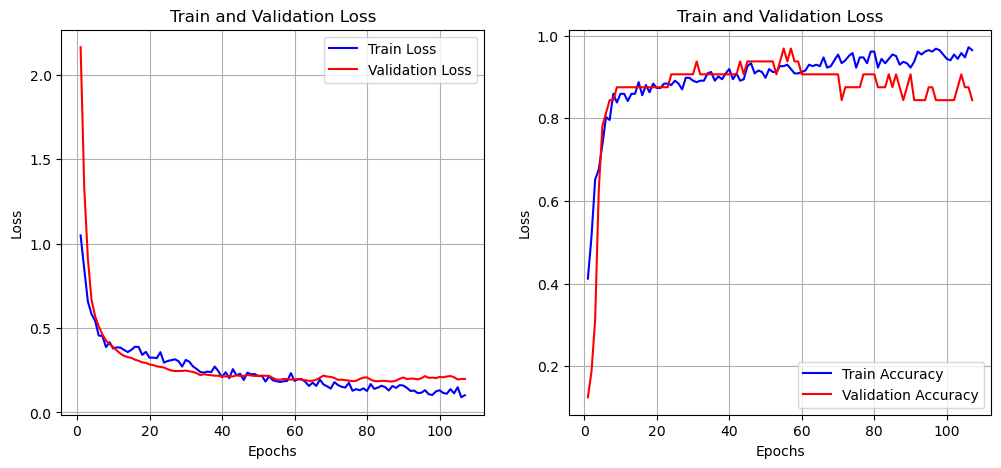

In [ ]:
history_dict = history.history

fig = plt.figure(figsize=(12, 5))

epochs = range(1, len(history_dict['loss']) + 1)
loss = history_dict['loss']
val_loss = history_dict['val_loss']

ax_1 = fig.add_subplot(1, 2, 1)

ax_1.plot(epochs, loss, 'b', label='Train Loss')
ax_1.plot(epochs, val_loss, 'r', label='Validation Loss')

ax_1.set_title("Train and Validation Loss")
ax_1.set_xlabel("Epochs")
ax_1.set_ylabel("Loss")
ax_1.grid()
ax_1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax_2 = fig.add_subplot(1, 2, 2)

ax_2.plot(epochs, accuracy, 'b', label='Train Accuracy')
ax_2.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')

ax_2.set_title("Train and Validation Loss")
ax_2.set_xlabel("Epochs")
ax_2.set_ylabel("Loss")
ax_2.grid()
ax_2.legend()

plt.show()

### 모델 평가 및 예측

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8608


[0.29702576994895935, 0.8607594966888428]

In [ ]:
y_pred = ['MS' if val < 0.5 else 'GP' for val in model.predict(x_test)]
y = ['MS' if val < 0.5 else 'GP' for val in y_test]

3/3 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, y_pred)

print(acc)

0.8607594936708861
